**Chapter 2 – End-to-end Machine Learning project**

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

*This notebook contains all the sample code and solutions to the exercices in chapter 2.*

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

<I>Source: Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. O'Reilly Media. Kindle Edition.</I>

# 보충 자료
- 파이썬 객체지향 프로그래밍: 클래스의 개념과 정의 및 활용방법에 대해 잘 설명된 자료이니 참고하시기 바랍니다.
https://datascienceschool.net/01%20python/02.12%20%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EA%B0%9D%EC%B2%B4%EC%A7%80%ED%96%A5%20%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D.html

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
#
# 파이썬 코드를 실행하기 위한 사전 준비
#

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)            # Set the current rcParams: 'axes'
mpl.rc('xtick', labelsize=12)           # Set the current rcParams: 'xtick'
mpl.rc('ytick', labelsize=12)           # Set the current rcParams: 'ytick'

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# 특정한 경로에 그림 파일을 저장하기 위한 함수를 정의.
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)    # 파일을 저장할 경로를 문자열변수(path)에 저장.
    print("Saving figure", fig_id)                                    # 파일명을 화면에 표시.
    if tight_layout:                                                  # tight_layout 값을 True로 함수를 호출한 경우:
        plt.tight_layout()                                            # Adjust the padding between and around subplots.
    plt.savefig(path, format=fig_extension, dpi=resolution)           # 특정 경로(path)에 현재(current) 그림을 저장.

In [2]:
#+ 문자열 변수에 저장된 현재 프로젝트 경로를 확인.
PROJECT_ROOT_DIR

'.'

#### Reference
https://matplotlib.org/stable/api/matplotlib_configuration_api.html?highlight=rc#matplotlib.rc<br>
https://matplotlib.org/stable/api/matplotlib_configuration_api.html?highlight=rc#matplotlib.rcParams<br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html?highlight=tight_layout#matplotlib.pyplot.tight_layout<br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html?highlight=savefig#matplotlib.pyplot.savefig<br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html?highlight=suptitle#matplotlib.pyplot.suptitle

#### Part of rcParams
axes.labelsize: x 및 y 레이블의 글꼴 크기<br>
axes.titlesize: 축 제목의 글꼴 크기<br>
figure.titlesize: 그림 제목의 크기 (matplotlib.pyplot.suptitle(), Figure.suptitle())<br>
xtick.labelsize: x축 눈금 레이블의 글꼴 크기<br>
ytick.labelsize: y축 눈금 레이블의 글꼴 크기<br>
legend.fontsize: 범례의 글꼴 크기 (matplotlib.pyplot.legend(), Figure.legend())<br>
legend.title_fontsize: 범례 제목의 글꼴 크기, 없음은 기본 축과 동일하게 설정<br>

In [3]:
# 그림을 그리기 위해 설정된 레이블 크기를 확인.
plt.rcParams['axes.labelsize'], plt.rcParams['xtick.labelsize'], plt.rcParams['ytick.labelsize']

(14.0, 12.0, 12.0)

#### Main steps in machine learning projects
1. Look at the big picture. 
2. Get the data. 
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

# <font color='darkred'>Working with Real Data</font>

#### Popular open data repositories
UC Irvine Machine Learning Repository: http://archive.ics.uci.edu/ml/index.php<br>
Kaggle datasets Amazon’s AWS datasets: https://www.kaggle.com/datasets<br>
#### Meta portals (they list open data repositories)
Data Portals: http://dataportals.org/<br>
OpenDataMonitor: https://opendatamonitor.eu/frontend/web/index.php?r=dashboard%2Findex<br>
Quandl: https://data.nasdaq.com/<br>
#### Other pages listing many popular open data repositories
Wikipedia’s list of Machine Learning datasets: https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research<br>
Quora.com: https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public<br>
The datasets subreddit: https://www.reddit.com/r/datasets/<br>

# <font color='darkred'>Step 1. Look at the Big Picture (큰 그림 보기)</font>

Your model should learn from this data and be able to <b>predict the median housing price in any district</b>, given all the other metrics.

## 1.1 Frame the Problem (문제 정의)
The first question to ask your boss is <b>what exactly the business objective is</b>. Building a model is probably not the end goal. How does the company expect to use and <b>benefit from this model?</b> Knowing the objective is important because it will <b>determine how you frame the problem</b>, <b>which algorithms you will select</b>, which <b>performance measure</b> you will use to evaluate your model, and how much effort you will spend tweaking it.

## 1.2 Select a Performance Measure (성능 측정 지표 선택)
Your next step is to select a performance measure. A typical performance measure for regression problems is the <b>Root Mean Square Error (RMSE)</b>. It gives an idea of how much error the system typically makes in its predictions, with a <b>higher weight for large errors</b>.

## 1.3 Check the Assumptions (가정 검사)
<b>Lastly, it is good practice to list and verify the assumptions that have been made so far (by you or others); this can help you catch serious issues early on.</b>For example, the district prices that your system outputs are going to be fed into a downstream Machine Learning system, and you assume that these prices are going to be used as such. But what if the downstream system converts the prices into categories (e.g., “cheap,” “medium,” or “expensive”) and then uses those categories instead of the prices themselves? In this case, getting the price perfectly right is not important at all; your system just needs to get the category right. If that’s so, then the problem should have been framed as a classification task, not a regression task. You don’t want to find this out after working on a regression system for months.

# <font color='darkred'>Step 2. Get the Data (데이터 가져오기)</font>

## 2.1 Create the Workspace (작업환경 만들기)
Refer to the textbook (pp.75-79)

## 2.2 Download the Data (데이터 다운로드)

In [4]:
# 웹의 특정 링크로부터 데이터를 다운로드 후, 로컬 컴퓨터의 특정 경로에 저장

import os               # 기타 운영 체제 인터페이스
                        # os.path: 일반적인 경로명 조작
import tarfile          # tar 아카이브 파일 읽기와 쓰기
import urllib.request   # URL을 열기 위한 확장 가능한 라이브러리

# 문자열 변수에 경로명을 저장
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"  # 웹의 원본 파일이 존재하는 상위 경로(링크)를 지정
HOUSING_PATH = os.path.join("datasets", "housing")                              # 두 문자열을 결합시켜, 파일을 저장할 로컬 경로를 지정
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"                    # 웹의 원본 파일이 존재하는 세부 경로를 지정

# 특정한 url(HOUSING_URL)로부터 데이터 파일을 내려받아 특정한 경로에 저장하기 위한 함수 정의
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):                   # 파일 저장 경로가 이미 존재하는지 확인하고, 없다면 새로 생성.
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")  # 압축파일 형태의 데이터 파일을 저장하기 위한 로컬 경로를 생성하여 문자열 변수(tgz_path)에 저장.
    urllib.request.urlretrieve(housing_url, tgz_path)     # url주소(housing_url)에서 파일을 내려받아 로컬 경로(tgz_path)에 저장.
    housing_tgz = tarfile.open(tgz_path)                  # Tarfile을 연다. "경로명 name에 대한 TarFile 객체를 반환."
    housing_tgz.extractall(path=housing_path)             # 압축 파일에 속한 모든 파일을 해제한다. "아카이브의 모든 멤버(members)를 현재 작업 디렉터리나 디렉터리 path로 추출."
    housing_tgz.close()                                   # Tarfile을 닫는다. 파일을 사용하기 위해서 전후로 열기/닫기 수행이 필요. 

#### Refer to the following link(s):
https://docs.python.org/ko/3/library/os.path.html<br>
https://docs.python.org/ko/3/library/tarfile.html?highlight=tarfile#module-tarfile<br>
https://docs.python.org/3/library/os.path.html?highlight=os%20path#module-os.path<br>
https://docs.python.org/3/library/urllib.request.html?highlight=urlretrieve#urllib.request.urlretrieve<br>

In [5]:
#+ 문자열 변수에 저장된 경로명의 값을 확인.
DOWNLOAD_ROOT, HOUSING_PATH, HOUSING_URL

('https://raw.githubusercontent.com/ageron/handson-ml2/master/',
 'datasets/housing',
 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz')

In [6]:
# fetch_housing_data() 사용자 정의 함수를 호출하여 웹의 링크로부터 데이터 파일을 다운로드 후 로컬 컴퓨터에 저장
fetch_housing_data()

In [7]:
# 입력된 경로(문자열)에서 파일(CSV 확장자의 데이터)을 읽어 DataFrame에 저장 후 반환하는 함수를 생성.
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")  # CSV파일을 저장하기 위한 경로를 문자열변수(csv_path)에 저장한다.
    return pd.read_csv(csv_path)                          # Read a comma-separated values (csv) file into DataFrame.

#### Refer to the following link(s):
https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=read_csv#pandas.read_csv

In [8]:
#+ DataFrame 클래스의 생김새를 파악.
import inspect
inspect.getsourcefile(pd.DataFrame)    # DataFrame 클래스가 정의된 파일을 찾는다.

'/Users/boysbeanxious/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py'

https://github.com/pandas-dev/pandas/tree/main/pandas/core/frame.py

## Take a Quick Look at the Data Structure

#### Checkpoints for Data Sets
1. How many instances?<br>
2. How many columns? and what are they?<br>
3. How many missing values in what columns?<br>
4. What is the data type of each column? numerical(float/int?) or categorical?<br>
5. How many instances belong to each category? --> value_counts()<br>
6. Descriptive statistics of numerical attributes --> describe()<br>

In [9]:
# 사용자 정의 함수(load_housing_data())를 호출하여 housing에 데이터를 저장한다.
housing = load_housing_data()    # load_housing_data() 함수를 호출하여 반환된 DataFrame 객체를 반환한다.

In [10]:
# 데이터의 일부를 직접 확인한다.
housing.head()                   # DataFrame 객체의 head() 메소드(클래스의 멤버 함수)를 호출하여, 첫 5(default)행을 반환한다.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head

In [11]:
# DataFrame 객체의 정보(속성명, 속성값의 데이터 유형, 결측치)를 확인한다.
housing.info()    # Print a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info

In [12]:
# 카테고리형 변수에 대해 값의 분포를 집계.
housing["ocean_proximity"].value_counts()  # Return a Series containing counts of unique rows in the DataFrame.

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html?highlight=value_counts#pandas.DataFrame.value_counts

In [13]:
# 숫자형 변수에 대한 통계값을 계산.
housing.describe()   # Generate descriptive statistics.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html?highlight=describe#pandas.DataFrame.describe

Saving figure attribute_histogram_plots


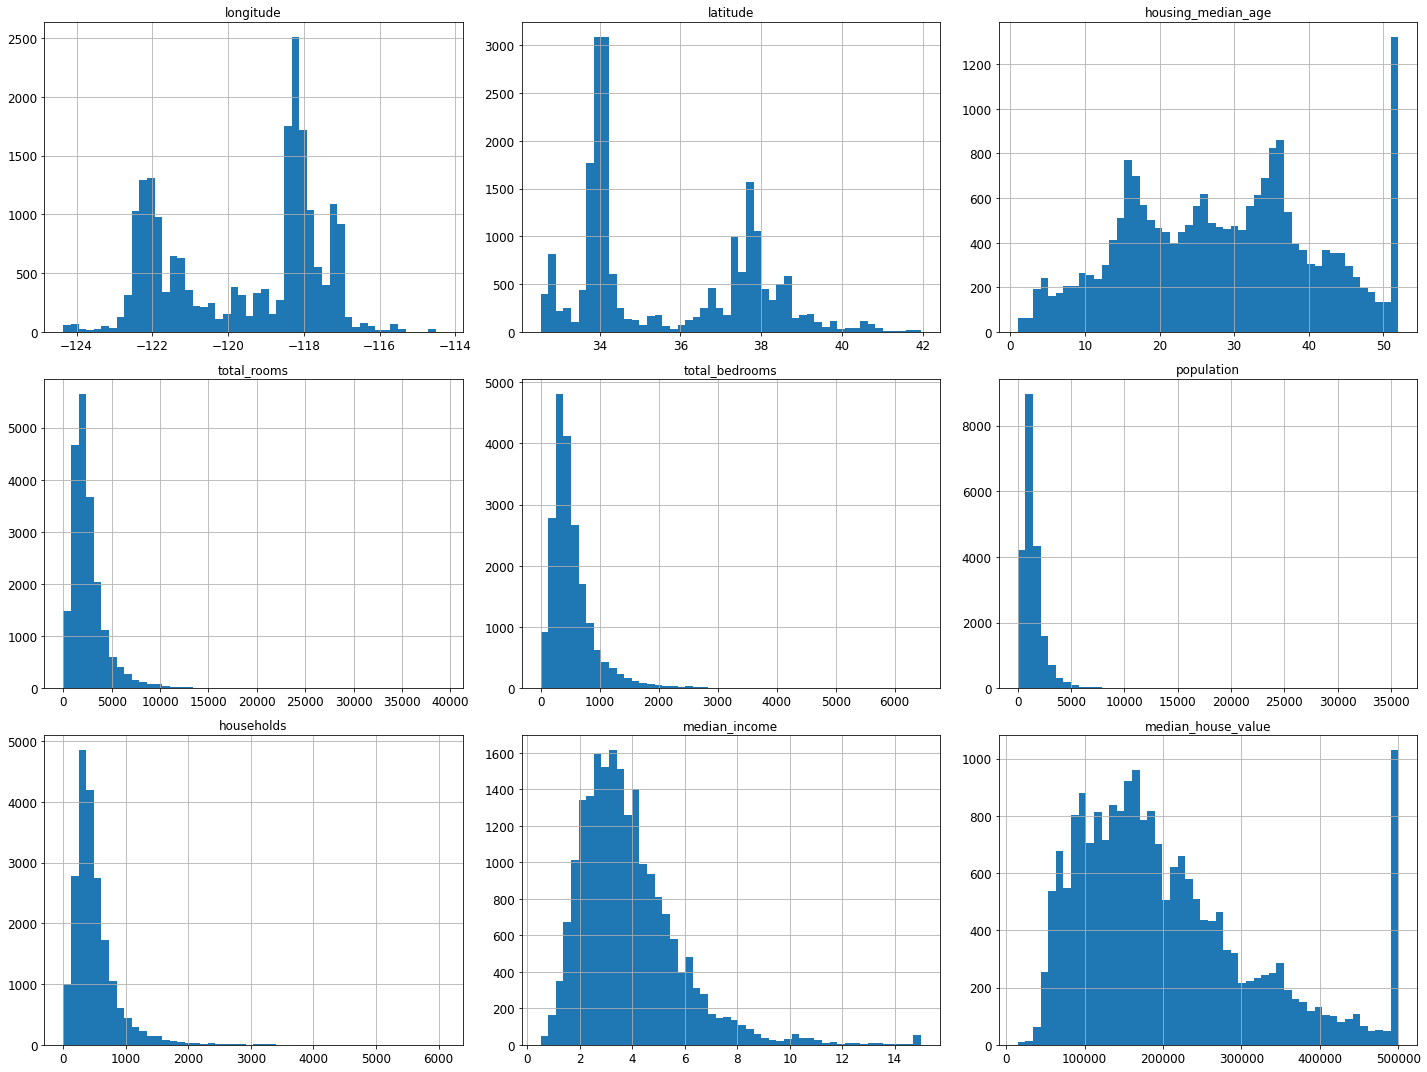

In [14]:
# 각 특성(컬럼)의 분포를 살펴보기 위해 히스토그램 생성.
%matplotlib inline
import matplotlib.pyplot as plt           # matplotlib.pyplot is a state-based interface to matplotlib. 
                                          # It provides an implicit, MATLAB-like, way of plotting. 
                                          # It also opens figures on your screen, and acts as the figure GUI manager.
housing.hist(bins=50, figsize=(20,15))    # Make a histogram of the DataFrame’s columns.
#housing.hist(bins=100, figsize=(20,15))
save_fig("attribute_histogram_plots")     # 사용자 정의 함수(save_fig)에 figure id를 매개변수로 전달하여 그림 파일을 로컬 컴퓨터에 저장한다. (확장자, 경로명은 디폴트값 사용)
plt.show()                                # Display all open figures.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html?highlight=hist#pandas.DataFrame.hist<br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html?highlight=show#matplotlib.pyplot.show<br>

## Create a Test Set

In [15]:
import numpy as np

In [16]:
# to make this notebook's output identical at every run
np.random.seed(42)

https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html?highlight=random%20seed#numpy.random.seed

Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. The simplest function is train_test_split(), which does pretty much the same thing as the function split_train_test(), with a couple of additional features. First, there is a random_state parameter that allows you to set the random generator seed. Second, you can pass it multiple datasets with an identical number of rows, and it will split them on the same indices (this is very useful, for example, if you have a separate DataFrame for labels):

In [17]:
# 원본 데이터셋을 학습/테스트 셋으로 분리하여 저장.
from sklearn.model_selection import train_test_split

# Split arrays or matrices into random train and test subsets.
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
  # test_set의 비율이 전체 데이터(housing)의 20%(0.2)가 되도록 분리해서 반환한다.
  # random_state: Controls the shuffling applied to the data before applying the split.
  #               Pass an int for reproducible output across multiple function calls.
  #               * 동일 데이터셋에 대해 동일한 매개변수로 호출 시 동일한 데이터셋을 반환하므로, 샘플링이 성능에 미치는 영향을 제거한다.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [18]:
#+ 데이터셋의 유형(클래스), 샘플 수, 행과 열 개수을 확인
type(train_set), type(test_set), \
len(train_set), len(test_set), \
train_set.shape, test_set.shape

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 16512,
 4128,
 (16512, 10),
 (4128, 10))

In [19]:
#+ 테스트셋의 데이터 일부를 확인.
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


#### <i>Stratified Sampling and Random Sampling (계층적 샘플링과 무작위(랜덤) 샘플링)</i>
Suppose you chatted with experts who told you that <b>the median income is a very important attribute to predict median housing prices<b>. You may want to ensure that <b>the test set is representative of the various categories of incomes in the whole dataset<b>. Since the median income is a continuous numerical attribute, you first need to create an income category attribute.

<AxesSubplot:>

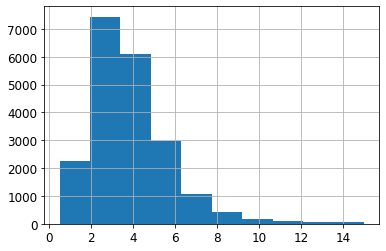

In [20]:
# median_income이 원본에서 어떤 분포를 갖는지 확인.
housing["median_income"].hist()

In [21]:
# 연속형 변수인 median_income으로부터 5개의 값을 가진 카테고리형 변수인 income_cat을 생성하고, 각각에 레이블(1~5)을 설정.
housing["income_cat"] = pd.cut(housing["median_income"],                # 연속 값을 이산 구간(discrete intervals)으로 분리.
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].head(10)

0    5
1    5
2    5
3    4
4    3
5    3
6    3
7    3
8    2
9    3
Name: income_cat, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

/Users/boysbeanxious/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6674: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


<AxesSubplot:>

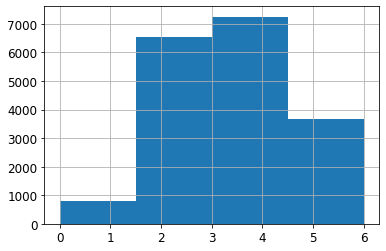

In [22]:
housing["median_income"].hist( bins=[0., 1.5, 3.0, 4.5, 6., np.inf])

In [23]:
housing.groupby(["income_cat"]).mean()["median_income"]

income_cat
1    1.211262
2    2.325457
3    3.686134
4    5.132392
5    7.722912
Name: median_income, dtype: float64

In [24]:
housing.groupby(["income_cat"]).min()["median_income"]

income_cat
1    0.4999
2    1.5026
3    3.0021
4    4.5022
5    6.0050
Name: median_income, dtype: float64

In [25]:
housing.groupby(["income_cat"]).max()["median_income"]

income_cat
1     1.5000
2     3.0000
3     4.5000
4     6.0000
5    15.0001
Name: median_income, dtype: float64

https://pandas.pydata.org/docs/reference/api/pandas.cut.html?highlight=cut#pandas.cut

<AxesSubplot:>

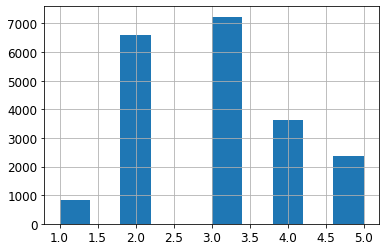

In [26]:
# 카테고리형 변수 income_cat의 분포를 확인하기 위해 histogram을 생성.
housing["income_cat"].hist()

In [27]:
# import matplotlib.pyplot as plt

# weight = housing["income_cat"].values
# plt.bar(weight)

# plt.show()

In [28]:
################################################################################
# 계층적 샘플링을 통해 원본 데이터셋을 학습/테스트 셋으로 분리.
################################################################################
from sklearn.model_selection import StratifiedShuffleSplit

# stratified sampling (계층적 샘플링)
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)  
        # StratifiedShuffleSplit 클래스의 객체 strat_split를 생성.
        # e.g., df = pd.DataFrame(...)  --> DataFrame 클래스의 객체 df를 생성.

# n_split의 값만큼 반복실행되며, StratifiedShuffleSplit.split()함수는 각 실행 시마다 서로 다른 train_set, test_set을 반환.
for train_index, test_index in strat_split.split(housing, housing["income_cat"]):
    print("train_index:", train_index)
    print("test_index:", test_index)
    strat_train_set = housing.loc[train_index]  # train_index에 해당하는 row들만 추출해서 strat_train_set에 저장.
    strat_test_set = housing.loc[test_index]    # test_index에 해당하는 row들만 추출해서 strat_test_set에 저장.

train_index: [17606 18632 14650 ... 13908 11159 15775]
test_index: [ 5241 10970 20351 ...  4019 12107  2398]


sklearn.model_selection.StratifiedShuffleSplit: Provides train/test indices to split data in train/test sets.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html?highlight=stratifiedshufflesplit<br>
pandas.DataFrame.loc: Access a group of rows and columns by label(s) or a boolean array.<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html?highlight=loc#pandas.DataFrame.loc<br>

In [29]:
# StratifiedShuffleSplit.split()함수를 통해 할당된 학습용 인덱스의 데이터셋을 확인.
housing.loc[train_index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3


##### property DataFrame.loc
Access a group of rows and columns by label(s) or a boolean array.<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html?highlight=loc#pandas.DataFrame.loc

In [30]:
# 학습/테스트 데이터셋의 크기를 확인.
train_index.shape, test_index.shape, \
len(train_index)/len(housing), len(test_index)/len(housing)

((16512,), (4128,), 0.8, 0.2)

In [31]:
# 계층적 샘플링(stratified sampling)된 데이터셋 중 테스트셋(strat_test_set)에서 income_cat의 분포를 확인.
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [32]:
# 원본 데이터셋(housing)에서 income_cat의 분포를 확인한다. --> 계층적 샘플링의 결과가 원본과 유사함을 확인 가능.
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [33]:
#+ value_counts()에서 반환된 값으로부터 DataFrame 생성 시, income_cat값으로 인덱스 생성.
pd.DataFrame(housing["income_cat"].value_counts())

,income_cat
3,7236
2,6581
4,3639
5,2362
1,822


In [34]:
################################################################################
# 계층적 샘플링과 랜덤 샘플링의 결과에서 얼마나 차이가 발생할 것인지 확인.
################################################################################

# 매개변수로 전달된 데이터셋(data)에서 income_cat 컬럼 값의 분포를 보여주는 함수를 정의.
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

# random sampling
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Compare proportions 생성
#     원본(Overall), 계층적 샘플링(Stratified), 랜덤 샘플링(Random)에 따른 income_cat의 비율을 계산하여 컬럼별로 저장.
#     인덱스로 정렬 실시: 윗 셀에서 보이듯 income_cat 값이 인덱스에 저장되어 이 값을 기준으로 오름차순 정렬.
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

# income_cat에 대해 Random sampling과 stratfied sampling이 원본(overall)의 분포와 얼마나 차이가 나는지를 계산한 결과를 오차(error, %)로 계산한다.
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [35]:
#+ 데이터 값 확인을 위해 실행
income_cat_proportions(housing), income_cat_proportions(strat_test_set), income_cat_proportions(test_set)

(3    0.350581
 2    0.318847
 4    0.176308
 5    0.114438
 1    0.039826
 Name: income_cat, dtype: float64,
 3    0.350533
 2    0.318798
 4    0.176357
 5    0.114583
 1    0.039729
 Name: income_cat, dtype: float64,
 3    0.358527
 2    0.324370
 4    0.167393
 5    0.109496
 1    0.040213
 Name: income_cat, dtype: float64)

In [36]:
# 샘플링 방법에 따라 원본의 비율이 유지되는지 여부를 확인.
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [37]:
#+ 데이터 값 확인을 위해 실행: income_cat 컬럼이 존재
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


In [38]:
# 각 데이터셋(strat_train_set, strat_test_set)에서 income_cat 컬럼을 삭제.
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)   # axis=0(row), axis=1(column)
                                                    # inplace=True --> set_에 삭제를 반영. False일 때에는 반환결과에만 반영

pandas.DataFrame.drop: Drop specified labels from rows or columns.<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas.DataFrame.drop

In [39]:
# income_cat 컬럼이 삭제된 것을 확인 가능.
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


# <font color='darkred'>Step 3. Discover and Visualize the Data to Gain Insights</font>

In [40]:
# Create a copy to play with it without harming the training set
housing = strat_train_set.copy()  

##### DataFrame.copy(deep=True)
Make a copy of this object’s indices and data.<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html?highlight=copy#pandas.DataFrame.copy<br>
When deep=True (default), a new object will be created with a copy of the calling object’s data and indices. Modifications to the data or indices of the copy will not be reflected in the original object (see notes below).<br>
When deep=False, a new object will be created without copying the calling object’s data or index (only references to the data and index are copied). Any changes to the data of the original will be reflected in the shallow copy (and vice versa).<br>


## Visualizing Geographical Data

Since there is geographical information (latitude and longitude), it is a good idea to create a scatterplot of all districts to visualize the data:

Saving figure bad_visualization_plot


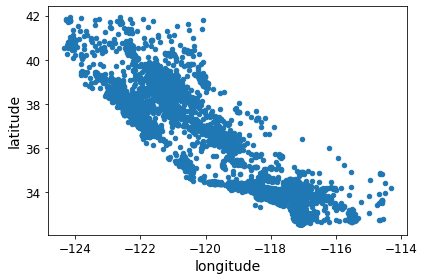

In [41]:
# 산점도(scatter plot)에 표시된 marker의 투명도가 동일하여 밀집도의 분간이 어려움.
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

##### DataFrame.plot(\*args, \*\*kwargs): Make plots of Series or DataFrame.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot<br>
Parameters:<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#:~:text=xlabel%20or%20position%2C%20default,hexbin%20plot%20(DataFrame%20only)<br>

This looks like California all right, but other than that it is <b>hard to see any particular pattern</b>. Setting the alpha option to 0.1 makes it <b>much easier to visualize the places where there is a high density of data points</b>:

Saving figure better_visualization_plot


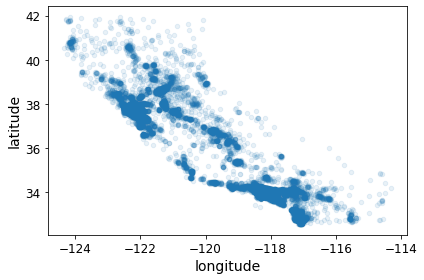

In [42]:
# 매개변수 alpha값을 지정함으로써 지역별 밀집도의 차이를 시각화: 여러 지역이 겹친 위치에서는 density가 높아짐.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

alpha?:<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#:~:text=in%20version%201.0.0.-,**kwargs,Options%20to%20pass%20to%20matplotlib%20plotting%20method.,-Returns<br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html?highlight=plot#:~:text=alpha,scalar%20or%20None<br>

The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611 ). Thanks to Wilmer Arellano for pointing it out.

In [43]:
# 인구수(population)도 함께 시각화하기 위해 값의 분포를 확인.
housing["population"].describe()

count    16512.000000
mean      1419.790819
std       1115.686241
min          3.000000
25%        784.000000
50%       1164.000000
75%       1719.250000
max      35682.000000
Name: population, dtype: float64

Saving figure housing_prices_scatterplot


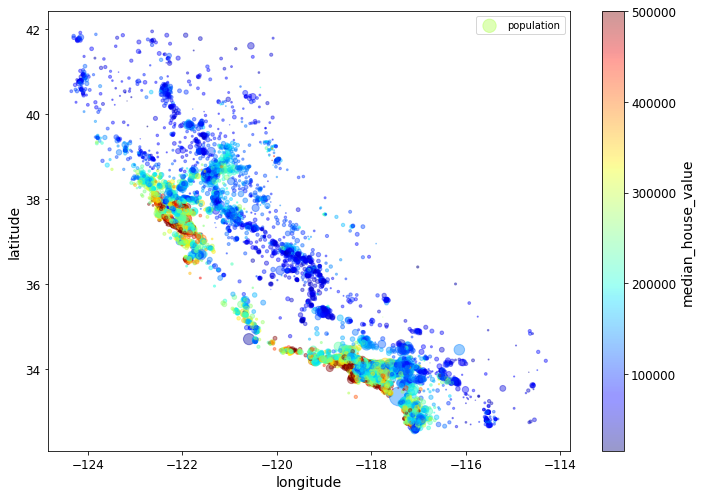

In [44]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
# 위의 코드와 동일한 기능 수행:
#housing.plot.scatter(x="longitude", y="latitude", alpha=0.4,
#             s=housing["population"]/100, label="population", figsize=(10,7),
#             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
#             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html?highlight=scatter#pandas.DataFrame.plot.scatter

In [45]:
# 
# 캘리포니아 지도를 다운로드 후 지정 경로에 저장
#
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7feeb9372810>)

Saving figure california_housing_prices_plot


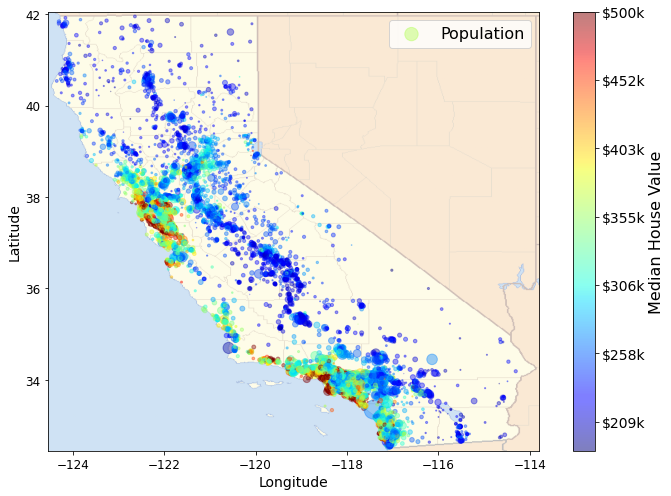

In [46]:
#
# 캘리포니아 지도 위에 산점도를 표시하여, district의 위치(바다와의 인접여부)가 밀집도, 집값 등에 미치는 영향을 시각적으로 파악.
#
# 캘리포니아 지도를 plot에 표시.
import matplotlib.image as mpimg
california_img = mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# plot에 colorbar를 추가.
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())                                 
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)  # 문자열 list를 y축 레이블에 설정.
cbar.set_label('Median House Value', fontsize=16)                                    # 문자열을 colorbar의 레이블에 설정.

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

##### matplotlib.image
The image module supports basic image loading, rescaling and display operations.<br>
https://matplotlib.org/stable/api/image_api.html?highlight=matplotlib%20image#module-matplotlib.image<br>
##### matplotlib.image.imread(fname, format=None)
Read an image from a file into an array.<br>
https://matplotlib.org/stable/api/image_api.html#matplotlib.image.imread<br>
##### matplotlib.pyplot.imshow(X, cmap=None, norm=None, \*, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, \*\*kwargs)
Display data as an image, i.e., on a 2D regular raster.<br>
<b>Parameters:</b><br>
<b>X: array-like or PIL image</b><br>
The image data. Supported array shapes are:<br>
(M, N): an image with scalar data. The values are mapped to colors using normalization and a colormap. See parameters norm, cmap, vmin, vmax.<br>
(M, N, 3): an image with RGB values (0-1 float or 0-255 int).<br>
<i><u>(M, N, 4): an image with RGBA values (0-1 float or 0-255 int), i.e. including transparency.</u></i><br>
The first two dimensions (M, N) define the rows and columns of the image.<br>
Out-of-range RGB(A) values are clipped.<br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html?highlight=imshow#matplotlib.pyplot.imshow<br>
##### numpy.linspace
numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)<br>
Return evenly spaced numbers over a specified interval.<br>
https://numpy.org/doc/stable/reference/generated/numpy.linspace.html?highlight=linspace#numpy.linspace<br>
##### matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, \*\*kw)
Add a colorbar to a plot.<br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html?highlight=colorbar#matplotlib.pyplot.colorbar<br>
##### matplotlib.legend
The legend module defines the Legend class, which is responsible for drawing legends associated with axes and/or figures.<br>
https://matplotlib.org/stable/api/legend_api.html?highlight=legend#module-matplotlib.legend<br>
##### Colorbar Tick Labelling
Produce custom labelling for a colorbar.<br>
https://matplotlib.org/stable/gallery/ticks/colorbar_tick_labelling_demo.html?highlight=set_yticklabels<br>
##### matplotlib.axes.Axes.set_yticklabels
Axes.set_yticklabels(labels, \*, fontdict=None, minor=False, \*\*kwargs)
Set the yaxis' labels with list of string labels.<br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_yticklabels.html?highlight=set_ytick#matplotlib.axes.Axes.set_yticklabels

In [47]:
#+ california_img의 type을 확인.
type(california_img)

numpy.ndarray

In [48]:
#+ matplotlib.image의 shape을 확인.
california_img.shape  # (M, N, 4)

(674, 594, 4)

In [49]:
#+ california_img의 값을 확인.
california_img

array([[[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ]],

       [[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ]],

       [[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.666666

In [50]:
# 
prices.describe()

count     16512.000000
mean     206990.920724
std      115703.014830
min       14999.000000
25%      119800.000000
50%      179500.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [51]:
tick_values, tick_values/prices.max()

(array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 array([0.02999794, 0.12699815, 0.22399835, 0.32099856, 0.41799876,
        0.51499897, 0.61199918, 0.70899938, 0.80599959, 0.90299979,
        1.        ]))

In [52]:
tick_values

array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
       306000.2, 354500.4, 403000.6, 451500.8, 500001. ])

In [53]:
["$%dk"%(round(v/1000)) for v in tick_values]

['$15k',
 '$63k',
 '$112k',
 '$160k',
 '$209k',
 '$258k',
 '$306k',
 '$355k',
 '$403k',
 '$452k',
 '$500k']

In [54]:
cbar.draw_all()
plt.show()

In [55]:
housing[housing.median_house_value < 208999.8]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,127900.0,INLAND
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,140200.0,INLAND
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,95000.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
3754,-118.37,34.18,36.0,1608.0,373.0,1217.0,374.0,2.9728,190200.0,<1H OCEAN
12166,-117.14,33.81,13.0,4496.0,756.0,2044.0,695.0,3.2778,148800.0,INLAND
7364,-118.20,33.97,43.0,825.0,212.0,820.0,184.0,1.8897,174300.0,<1H OCEAN
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND


## Looking for Correlations

In [56]:
# 모든 특성 간의 상관계수를 계산.
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


##### pandas.DataFrame.corr
DataFrame.corr(method='pearson', min_periods=1)
Compute pairwise correlation of columns, excluding NA/null values.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html?highlight=corr#pandas.DataFrame.corr

In [57]:
# 특정 특성(집값)에 한정하여 다른 특성과의 상관계수를 표시. 값을 내림차순으로 정렬.
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


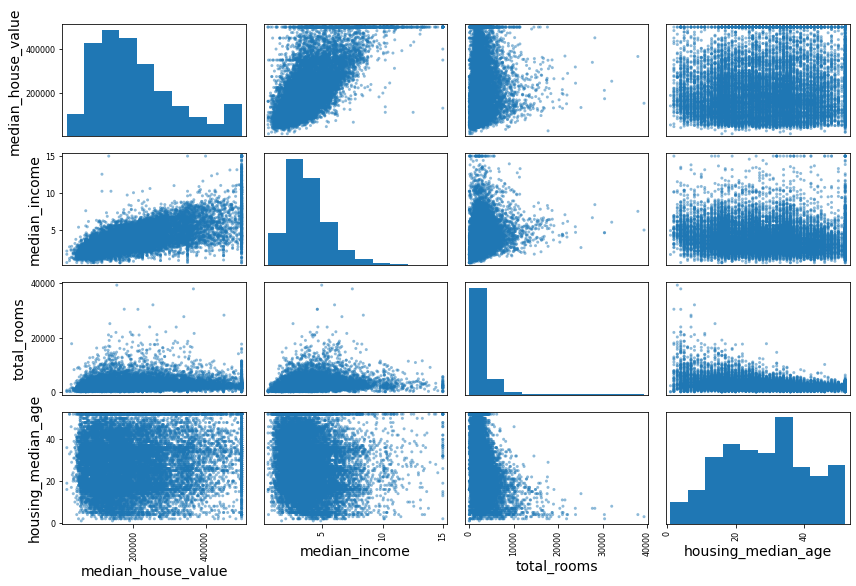

In [58]:
# 집값과 가장 산관성이 높은 것으로 나타난 특성들에 대해 산점도(scatter plot)의 행렬을 표시.

# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

##### pandas.plotting.scatter_matrix
pandas.plotting.scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, \*\*kwargs)<br>
Draw a matrix of scatter plots.<br>
https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html?highlight=scatter_matrix

Saving figure income_vs_house_value_scatterplot


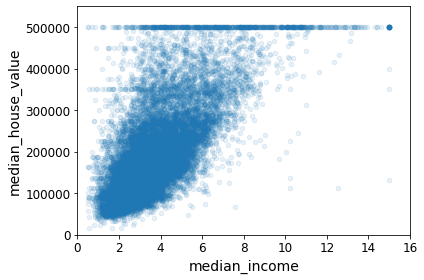

In [59]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
#housing.plot.scatter(x="median_income", y="median_house_value", alpha=0.1) # 위의 코드와 동일
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

##### pandas.DataFrame.plot.scatter
DataFrame.plot.scatter(x, y, s=None, c=None, \*\*kwargs)<br>
Create a scatter plot with varying marker point size and color.<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html?highlight=plot%20scatter#pandas.DataFrame.plot.scatter<br>

## Experimenting with Attribute Combinations

For example, the total number of rooms in a district is not very useful if you don’t know how many households there are. What you really want is the number of rooms per household. Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at.

Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (Kindle Locations 1330-1333). O'Reilly Media. Kindle Edition. 

In [60]:
# 예측하려는 값(median_house_value)에 좀 더 영향을 미치는 값이 무엇인지에 대해 고찰: 비즈니스에 대한 사전지식 활용.
# Which one would attrack more attention, #total rooms or #rooms per household?
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [61]:
# 특성의 조합에 의해 생성된 새로운 변수가 더 예측에 유용한지를 확인.
# Which columns are more correlated to median house values? total_rooms or rooms_per_household?
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [62]:
# Let's see what the correlation matrix looks like.
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.028345,0.095603,-0.000410
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,0.107621,-0.116884,0.005420
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.147186,0.136788,0.015031
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.127519,-0.192606,-0.024810
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.000377,0.086960,-0.028370
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,-0.074692,0.037778,0.076225
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,-0.083009,0.067162,-0.027416
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.311563,-0.624674,0.021822
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.146285,-0.259984,-0.021985
rooms_per_household,-0.028345,0.107621,-0.147186,0.127519,0.000377,-0.074692,-0.083009,0.311563,0.146285,1.000000,-0.398546,-0.005314


Saving figure scatter_matrix_plot_attribute_combinations


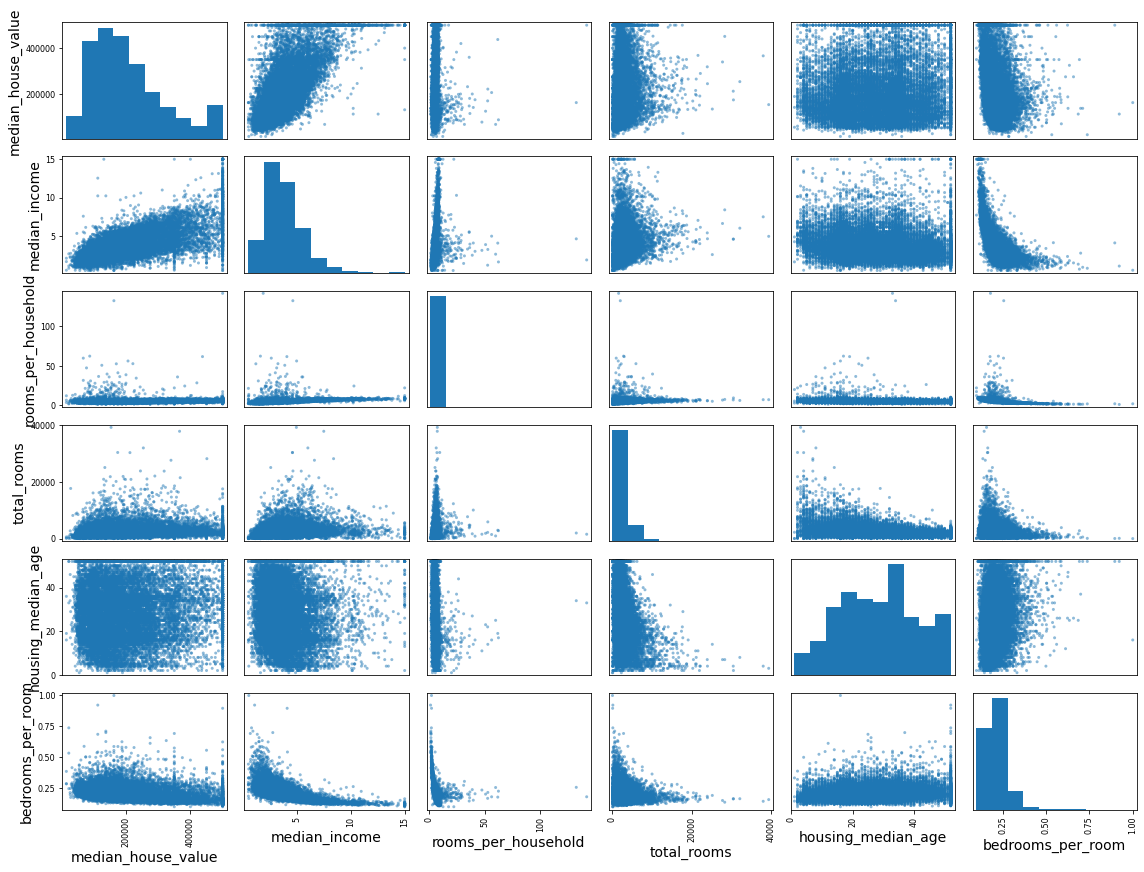

In [63]:
# 집값과 가장 산관성이 높은 것으로 나타난 특성들에 대해 산점도(scatter plot)의 행렬을 표시.
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "rooms_per_household", "total_rooms",
              "housing_median_age", "bedrooms_per_room"]
scatter_matrix(housing[attributes], figsize=(16, 12))
save_fig("scatter_matrix_plot_attribute_combinations")

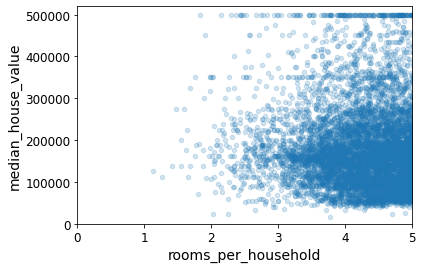

In [64]:
# Is rooms_per_household correlated to median_house_value?
# rooms_per_household와 median_house_value의 상관관계에는 outlier로 보이는 값들이 다수 존재
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

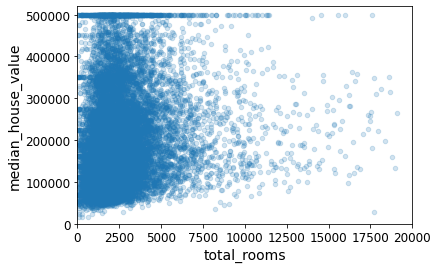

In [65]:
# Is rooms_per_household correlated to median_house_value?
housing.plot(kind="scatter", x="total_rooms", y="median_house_value",
             alpha=0.2)
plt.axis([0, 20000, 0, 520000])
plt.show()

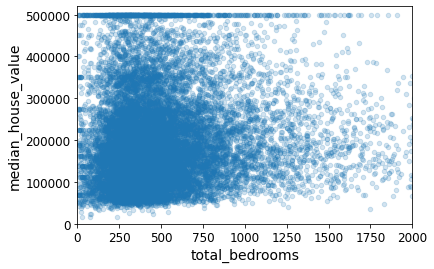

In [66]:
# Is rooms_per_household correlated to median_house_value?
housing.plot(kind="scatter", x="total_bedrooms", y="median_house_value",
             alpha=0.2)
plt.axis([0, 2000, 0, 520000])
plt.show()

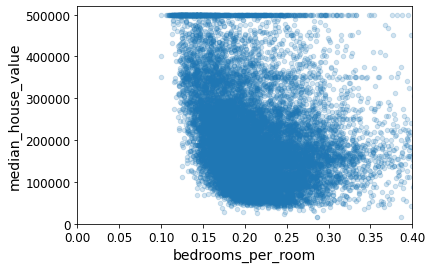

In [67]:
# Is bedrooms_per_room correlated to median_house_value?
housing.plot(kind="scatter", x="bedrooms_per_room", y="median_house_value",
             alpha=0.2)
plt.axis([0, 0.4, 0, 520000])
plt.show()

#### What are these processes for?
This round of exploration <b>does not have to be absolutely thorough</b>; the point is to start off on the right foot and <b>quickly gain insights</b> that will help you <b>get a first reasonably good prototype</b>. But this is an <b>iterative process</b>: once you <b>get a prototype up and running</b>, you can <b>analyze its output to gain more insights</b> and come back to this <b>exploration step<b>.

# <font color='darkred'>Step 4. Prepare the Data for Machine Learning Algorithms</font>

In [68]:
# 특성(featues) 중, Predictor와 Target을 분리.
# Apply transformation only to predictors.
housing = strat_train_set.drop("median_house_value", axis=1)    # predictors
housing_labels = strat_train_set["median_house_value"].copy()   # target

## Data Cleaning

In the textbook, 3 options for dealing with missing values are listed:

```python
housing.dropna(subset=["total_bedrooms"])    # option 1: Get rid of the instances(rows) with missing values
housing.drop("total_bedrooms", axis=1)       # option 2: Get rid of the features(columns) with missing values 
median = housing["total_bedrooms"].median()  # option 3: Set missing values to some value (zero, median, mean, etc.).
housing["total_bedrooms"].fillna(median, inplace=True)
```

To demonstrate each of them, let's create a copy of the housing dataset, but keeping only the rows that contain at least one null. Then it will be easier to visualize exactly what each option does:

In [69]:
# missing value를 갖는 feature를 확인.
housing.info()    # total_rooms has missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [70]:
# missing value를 갖는 컬럼이 하나라도 있는 경우, 해당 instance들의 최초 5행을 반환.
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [71]:
# how isnull() works?
# 모든 instance에 대해 모든 feature의 값이 null(missing value)이 아닌지 확인.
housing.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,False,False,False,False,False,False,False,False,False
18632,False,False,False,False,False,False,False,False,False
14650,False,False,False,False,False,False,False,False,False
3230,False,False,False,False,False,False,False,False,False
3555,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
6563,False,False,False,False,False,False,False,False,False
12053,False,False,False,False,False,False,False,False,False
13908,False,False,False,False,False,False,False,False,False
11159,False,False,False,False,False,False,False,False,False


In [72]:
# 동일 행에 대해 서로 다른 열의 값(True or False) 중, 어느 것 하나라도(any) True라면 --> True
# 즉, 어느 Feature(열)의 값이라도 null이 있다면 해당 instance(행)은 True라고 표시됨.
housing.isnull().any(axis=1)

17606    False
18632    False
14650    False
3230     False
3555     False
         ...  
6563     False
12053    False
13908    False
11159    False
15775    False
Length: 16512, dtype: bool

In [73]:
# Option 1: Get rid of the instances(rows) with missing values
sample_incomplete_rows.dropna(subset=["total_bedrooms"])  # inplace

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [74]:
# Option 2: Get rid of the features(columns) with missing values 
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [75]:
# Option 3: Set missing values to some value (zero, median, mean, etc.).
# total_bedrooms의 중간값을 확인하고, 해당 값이 null 대신 채워졌는지 확인.
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
median

433.0

In [76]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [77]:
# 라이브러리 함수를 활용한 missing value 처리 방법
# Scikit-Learn class to deal with missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

Remove the text attribute because median can only be calculated on numerical attributes:

In [78]:
# Predictor feature 중, numerical value와 categorical value는 서로 다르게 취급(전처리과정)해야 하므로, 둘을 서로 다른 DataFrame으로 분리.
# housing에서 ocean_proximity를 제외하면, numerical feature만 남게 됨: categorical feature를 미리 확인해둔 경우에 적용.
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number]) # housing에서 numerical value를 가진 feature만 선택.

In [79]:
# housing_num(i.e., numerical preditors)에 대해서 데이터 확인.
housing_num.shape, housing_num.head()

((16512, 8),
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 17606    -121.89     37.29                38.0       1568.0           351.0   
 18632    -121.93     37.05                14.0        679.0           108.0   
 14650    -117.20     32.77                31.0       1952.0           471.0   
 3230     -119.61     36.31                25.0       1847.0           371.0   
 3555     -118.59     34.23                17.0       6592.0          1525.0   
 
        population  households  median_income  
 17606       710.0       339.0         2.7042  
 18632       306.0       113.0         6.4214  
 14650       936.0       462.0         2.8621  
 3230       1460.0       353.0         1.8839  
 3555       4459.0      1463.0         3.0347  )

In [80]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [81]:
# statistics_에는 각 컬럼에 대해 median값이 계산되어있음을 확인 가능.
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Check that this is the same as manually computing the median of each attribute:

In [82]:
# statistics_에는 각 컬럼에 대해 median값이 계산되어있음을 확인 가능(계속).
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [83]:
# housing_num에 이미 반영된 것은 아님.
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


Transform the training set:

In [84]:
X = imputer.transform(housing_num)

In [85]:
type(X)

numpy.ndarray

In [86]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [87]:
# imputer를 적용한 후 missig value가 제거된 numerical predictor를 확인 가능.
# sample_incomplete_rows: missing value를 포함하는 housing의 instance들
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [88]:
# imputer를 적용한 후 missig value가 제거된 numerical predictor를 확인 가능.
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.6 MB


In [89]:
# The imputation strategy.
"""
If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.
If “median”, then replace missing values using the median along each column. Can only be used with numeric data.
If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.
If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.
"""
imputer.strategy

'median'

<중요> Scikit-Learn Design(사이킷런의 설계 철학, p.101)을 읽어보시기 바랍니다!

## Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [90]:
# categorical predictor를 별도의 DataFrame으로 저장.
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [91]:
# 값의 분포(빈도)를 확인.
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7276
INLAND             5263
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

### Converting categorical feature into numbers (Categorical Feature Encoding Methods)
Convert categories from text to numbers, since most ML algorithms prefer to work with numbers.<br>
교재에서 다루는 범주형 변수의 수치화 방법 2가지:<br>
Ordinal Encoding: Encode categorical features as an integer array. --> 변수의 개수는 그대로<br>
One-Hot Encoding: Encode categorical features as a one-hot numeric array. --> 변수의 개수가 증가(카테고리 값이 변수화)<br>

In [92]:
# Method 1: Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [93]:
# housing_cat_encoded에서 각 값에 부여된 category 확인
# --> 0:'<1H OCEAN', 1: 'INLAND', 2: 'ISLAND', 3: 'NEAR BAY', 4: 'NEAR OCEAN'
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

##### Problem:
One issue with this representation is that ML algorithms will assume that <b>two nearby values are more similar than two distant values</b>. This may be fine in some cases (e.g., for ordered categories such as “bad,” “average,” “good,” and “excellent”), but <b>it is obviously not the case for the ocean_proximity column</b> (for example, categories 0 and 4 are clearly more similar than categories 0 and 1).

##### Solution:
To fix this issue, a common solution is to create <b>one binary attribute per category</b>: one attribute equal to 1 when the category is “< 1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called dummy attributes.

In [94]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7276
INLAND             5263
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

In [95]:
# Method 2: One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()    # sparse=True (default) --> sparse matrix
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [96]:
# Let's see how the onehot-ecoded sparse matrix: (row, column), value
print(housing_cat_1hot)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
  (4, 0)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 1)	1.0
  (12, 0)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 0)	1.0
  (16, 3)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 1)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 1)	1.0
  (16489, 4)	1.0
  (16490, 3)	1.0
  (16491, 0)	1.0
  (16492, 3)	1.0
  (16493, 1)	1.0
  (16494, 1)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 3)	1.0
  (16498, 1)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16501, 0)	1.0
  (16502, 4)	1.0
  (16503, 0)	1.0
  (16504, 1)	1.0
  (16505, 1)	1.0
  (16506, 0)	1.0
  (16507, 1)	1.0
  (16508, 1)	1.0
  (16509, 1)	1.0
  (16510, 0)	1.0
  (16511, 3)	1.0


By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [97]:
# sparse matrix(희소행렬)을 dense matrix(밀집행렬)로 변환하는 방법.
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [98]:
# One-Hot Encoding의 결과 자체가 밀집행렬이 되도록 설정.
cat_encoder = OneHotEncoder(sparse=False) # --> dense array
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [99]:
# housing_cat_encoded에서 각 값에 부여된 category 확인.
# Ordinal Encoding과 동일한 결과임을 확인 가능.
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

##### What is Sparse Matrix(희소행렬)?
https://ko.wikipedia.org/wiki/%ED%9D%AC%EC%86%8C%ED%96%89%EB%A0%AC

## Custom Transformers (나만의 변환기? 사용자 지정 트랜스포머!)

Although Scikit-Learn provides many <b>useful transformers</b>, you will need to <b>write your own for tasks such as custom cleanup operations or combining specific attributes</b>. You will want your transformer to work seamlessly with Scikit-Learn functionalities (such as <b>pipelines</b>), and since Scikit-Learn relies on duck typing (not inheritance), all you need to do is <b>create a class and implement three methods: fit() (returning self), transform(), and fit_transform()</b>. You can get <b>the last one for free by simply adding TransformerMixin as a base class</b>. If you add BaseEstimator as a base class (and avoid \*args and \**kargs in your constructor), you will also get two extra methods (get_params() and set_params()) that will be useful for automatic hyperparameter tuning.

Let's create a custom transformer to add extra attributes:

In [100]:
#
# Create a class to conveniently select combined attributes (bedrooms_per_room)
#
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
    # def fit_transform: ... calls fit() and transform()
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [101]:
# Check how many columns are added
housing.shape, housing_extra_attribs.shape

((16512, 9), (16512, 11))

Refer to the following links:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html?highlight=baseestimator<br>
https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html?highlight=transformermixin<br>
https://numpy.org/doc/stable/reference/generated/numpy.c_.html<br>
https://numpy.org/doc/stable/reference/generated/numpy.r_.html<br>

In [102]:
# Check each column's index
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.8+ MB


Instead of the hard coded indices (3, 4, 5, 6), much cleaner to get them dynamically as follows:

In [103]:
# No need to check each column's index with the following codes
col_names = "total_rooms", "total_bedrooms", "population", "households"  # tuple
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

Also, `housing_extra_attribs` is a NumPy array, we've lost the column names (unfortunately, that's a problem with Scikit-Learn). To recover a `DataFrame`, you could run this:

In [104]:
type(housing_extra_attribs)

numpy.ndarray

In [105]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.00885,2.707965
14650,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.50581,3.047847


## Feature Scaling (특성 스케일링)

One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is generally not required.<br>
There are two common ways to get all attributes to have the same scale: <b>min-max scaling</b> and <b>standardization</b>.<br>
<b>Min-max scaling</b> (many people call this normalization) is the simplest: values are shifted and rescaled so that they end up <b>ranging from 0 to 1</b>. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called <b>MinMaxScaler</b> for this. It has a feature_range hyperparameter that lets you change the range if, for some reason, you don’t want 0–1.<br>
<b>Standardization</b> is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, <b>standardization does not bound values to a specific range, which may be a problem for some algorithms</b> (e.g., neural networks often expect an input value ranging from 0 to 1). However, <b>standardization is much less affected by outliers</b>. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called <b>StandardScaler</b> for standardization.

In [106]:
X = np.arange(7).reshape(-1, 1)  
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [108]:
X.mean(), X.std(), (X-X.mean())/X.std()

(3.0,
 2.0,
 array([[-1.5],
        [-1. ],
        [-0.5],
        [ 0. ],
        [ 0.5],
        [ 1. ],
        [ 1.5]]))

## Transformation Pipelines

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers (i.e., <b>they must have a fit_transform() method</b>). The names can be anything you like (as long as they are unique and don’t contain double underscores, \_\_); they will come in handy later for hyperparameter tuning. When you <b>call the pipeline’s fit() method</b>, it calls <b>fit_transform() sequentially on all transformers, passing the output of each call as the parameter to the next call until it reaches the final estimator, for which it calls the fit() method.<b>

Now let's build a pipeline for preprocessing the numerical attributes:

In [109]:
#
# Build a pipeline to execute data transformation steps in the right order.
#
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# a pipeline for the numerical features
num_pipeline = Pipeline([                              # list of ('name', estimator)
        ('imputer', SimpleImputer(strategy="median")), # all missiing values into median
        ('attribs_adder', CombinedAttributesAdder()),  # add_bedrooms_per_room=True(default) --> 3 attributes added
        ('std_scaler', StandardScaler()),              # standardization
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

##### sklearn.pipeline.Pipeline
class sklearn.pipeline.Pipeline(steps, \*, memory=None, verbose=False)<br>
Pipeline of transforms with a final estimator.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html?highlight=pipeline#sklearn.pipeline.Pipeline

In [110]:
# transformation 전의 데이터 확인.
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [111]:
# transformation 후의 데이터 확인.
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [112]:
# 3개의 컬럼이 추가됨을 확인할 수 있음.
housing_num.shape, housing_num_tr.shape

((16512, 8), (16512, 11))

In [113]:
from sklearn.compose import ColumnTransformer  # column에 따라 선별적인 transformer를 적용.

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),     # num_attribs에 포함된 column들 --> num_pipline에 의해 transformation
        ("cat", OneHotEncoder(), cat_attribs),  # cat_attribs에 포함된 column들 --> OneHotEncoder에 의해 transformation
    ])

housing_prepared = full_pipeline.fit_transform(housing)

##### sklearn.compose.ColumnTransformer
class sklearn.compose.ColumnTransformer(transformers, \*, remainder='drop', sparse_threshold=0.3, n_jobs=None, transformer_weights=None, verbose=False, verbose_feature_names_out=True)<br>
Applies transformers to columns of an array or pandas DataFrame.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html?highlight=columntransformer#sklearn.compose.ColumnTransformer<br>

In [114]:
# 변환된 데이터 값을 확인.
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [115]:
# 변환된 데이터의 차원(dimensionality)을 확인.
housing_prepared.shape

(16512, 16)

# <font color='darkred'>Step 5. Select and Train a Model</font>

Select and train potential model candidates.

## Training and Evaluating on the Training Set

In [116]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [117]:
# 학습 데이터 일부에 대해 전처리 파이프라인(preprocessing pipeline)을 적용해보기.
some_data = housing.iloc[:5]                                # predictors
some_labels = housing_labels.iloc[:5]                       # target
some_data_prepared = full_pipeline.transform(some_data)     # transformed predictors

print("Predictions:", lin_reg.predict(some_data_prepared))  # predictions

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


Compare against the actual values:

In [118]:
# 실제값(labels)과 예측값(predictions)을 서로 비교해보기.
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [119]:
# 성능측정지표(performance measure)의 값을 계산: RMSE 적용 시
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
#lin_mse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
# Note: since Scikit-Learn 0.22, you can get the RMSE directly by calling the mean_squared_error() function with squared=False
lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
lin_rmse

68628.19819848922

In [120]:
# 다른 성능측정지표(performance measure)를 활용한 경우: MAE 적용 시
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49439.89599001897

In [121]:
# 더 나은 성능을 보일 수 있는 모형을 찾기 위해, 다른 모형(DecisionTreeRegressor)을 시도.
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [122]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse   # perfect model with no error?
            # --> probably, overfitting!
            # --> 교차검증(cross-validation)이 필요: 학습 데이터의 일부로 훈련을 수행하고, 다른 일부분을 검증에 사용!

0.0

## Better Evaluation Using Cross-Validation

In [123]:
# Candidate Model 1: Decision Tree Regressor
# 10-fold cross-validation 
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)   # Why negative squared error? 
                                                                    # cross_val_score wants a utility function. 
                                                                    # The greater, the better! (See the warning below)
tree_rmse_scores = np.sqrt(-tree_scores)

##### sklearn.model_selection.cross_val_score
sklearn.model_selection.cross_val_score(estimator, X, y=None, \*, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2\*n_jobs', error_score=nan)<br>
Evaluate a score by cross-validation.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

<b>Warning</b><br>
Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -scores before calculating the square root.

In [124]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)    # 10-fold cross-validation --> 10 scores

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


In [125]:
# Candidate Model 2: Linear Regression
# 10-fold cross-validation 
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798347


**Note**: we specify `n_estimators=100` to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22 (for simplicity, this is not shown in the book).

In [126]:
# Candidate Model 3: Random Forest Regressor
# 10-fold cross-validation 
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

##### sklearn.ensemble.RandomForestRegressor
class sklearn.ensemble.RandomForestRegressor(n_estimators=100, \*, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)<br>
A random forest regressor.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=randomforestregressor#sklearn.ensemble.RandomForestRegressor

In [127]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

In [128]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean: 50182.303100336096
Standard deviation: 2097.0810550985693


# <font color='darkred'>Step 7. Fine-Tune Your Model (모델 세부 튜닝)</font>

Let’s assume that you now have a shortlist of promising models. You now need to fine-tune them. Let’s look at a few ways you can do that.

## Grid Search

In [129]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV를 통해 교차검증(Cross-validation) 대상 모델에 전달할 하이퍼 파라미터 값을 정의.
# RandomForestRegressor의 하이퍼 파라미터 목록을 아래의 이름과 비교하여 확인해보기!
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},                # try 12 (3×4) combinations of hyperparameters
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, # then try 6 (2×3) combinations with bootstrap set as False
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

##### sklearn.model_selection.GridSearchCV
class sklearn.model_selection.GridSearchCV(estimator, param_grid, \*, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2\*n_jobs', error_score=nan, return_train_score=False)<br>
Exhaustive search over specified parameter values for an estimator.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV

The best hyperparameter combination found:

In [130]:
# grid search cross-validation을 통해 얻어낸 최상의 하이퍼파라미터 조합을 확인: 
# --> 8과 30은 탐색범위의 경계값이므로 최적의 하이퍼파라미터가 아닐 수 있음 --> 범위 확장 필요!!
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [131]:
# 최적의 추정기(best estimator)을 확인: 선택된 모델에 대해 최적의 하이퍼 파라미터가 적용된 상태.
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [132]:
# 하이퍼 파라미터의 조합에 따른 평가점수를 확인.
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [133]:
# cv_results_에 담긴 여러 필드를 확인.
grid_search.cv_results_

{'mean_fit_time': array([0.06441102, 0.20293851, 0.61529827, 0.10121226, 0.33025446,
        0.98118925, 0.13408809, 0.45398588, 1.37311206, 0.17286882,
        0.57218518, 1.74072952, 0.09616408, 0.34407001, 0.132863  ,
        0.42760038, 0.1678853 , 0.53335919]),
 'std_fit_time': array([0.00349208, 0.00340204, 0.00743262, 0.00242454, 0.00581248,
        0.00618618, 0.00345584, 0.00447051, 0.00866584, 0.00366793,
        0.00576067, 0.00918216, 0.00297788, 0.01670577, 0.0083637 ,
        0.01031587, 0.00347469, 0.00410165]),
 'mean_score_time': array([0.00415611, 0.01077104, 0.03142428, 0.00414176, 0.01082892,
        0.03144436, 0.004776  , 0.01073198, 0.03209395, 0.00366821,
        0.01070051, 0.03187079, 0.00519538, 0.0150208 , 0.00453124,
        0.0137506 , 0.00495858, 0.01228766]),
 'std_score_time': array([0.00047801, 0.00081291, 0.00116829, 0.00014014, 0.00071863,
        0.00141117, 0.00049735, 0.00094879, 0.00049623, 0.00012635,
        0.00119404, 0.0011719 , 0.00049993, 

In [134]:
# cv_results_에 담긴 여러 필드를 확인하기 쉽게 DataFrame으로 변환
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.064411,0.003492,0.004156,0.000478,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.837622e+09,-4.147108e+09,...,-4.053756e+09,1.519591e+08,18,-1.064113e+09,-1.105142e+09,-1.116550e+09,-1.112342e+09,-1.129650e+09,-1.105559e+09,2.220402e+07
1,0.202939,0.003402,0.010771,0.000813,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047771e+09,-3.254861e+09,...,-3.094374e+09,1.327062e+08,11,-5.927175e+08,-5.870952e+08,-5.776964e+08,-5.716332e+08,-5.802501e+08,-5.818785e+08,7.345821e+06
2,0.615298,0.007433,0.031424,0.001168,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,...,-2.849913e+09,1.626875e+08,9,-4.381089e+08,-4.391272e+08,-4.371702e+08,-4.376955e+08,-4.452654e+08,-4.394734e+08,2.966320e+06
3,0.101212,0.002425,0.004142,0.000140,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.730181e+09,-3.786886e+09,...,-3.716847e+09,1.631510e+08,16,-9.865163e+08,-1.012565e+09,-9.169425e+08,-1.037400e+09,-9.707739e+08,-9.848396e+08,4.084607e+07
4,0.330254,0.005812,0.010829,0.000719,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,...,-2.781618e+09,1.268607e+08,8,-5.097115e+08,-5.162820e+08,-4.962893e+08,-5.436192e+08,-5.160297e+08,-5.163863e+08,1.542862e+07
5,0.981189,0.006186,0.031444,0.001411,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387153e+09,-2.588448e+09,...,-2.537883e+09,1.214614e+08,3,-3.838835e+08,-3.880268e+08,-3.790867e+08,-4.040957e+08,-3.845520e+08,-3.879289e+08,8.571233e+06
6,0.134088,0.003456,0.004776,0.000497,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.119657e+09,-3.586319e+09,...,-3.441458e+09,1.893056e+08,14,-9.245343e+08,-8.886939e+08,-9.353135e+08,-9.009801e+08,-8.624664e+08,-9.023976e+08,2.591445e+07
7,0.453986,0.004471,0.010732,0.000949,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.549663e+09,-2.782039e+09,...,-2.704645e+09,1.471569e+08,6,-4.980344e+08,-5.045869e+08,-4.994664e+08,-4.990325e+08,-5.055542e+08,-5.013349e+08,3.100456e+06
8,1.373112,0.008666,0.032094,0.000496,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.370010e+09,-2.583638e+09,...,-2.514673e+09,1.285080e+08,2,-3.838538e+08,-3.804711e+08,-3.805218e+08,-3.856095e+08,-3.901917e+08,-3.841296e+08,3.617057e+06
9,0.172869,0.003668,0.003668,0.000126,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.353504e+09,-3.348552e+09,...,-3.348850e+09,1.241939e+08,13,-9.228123e+08,-8.553031e+08,-8.603321e+08,-8.881964e+08,-9.151287e+08,-8.883545e+08,2.750227e+07


## Randomized Search

The <b>grid search</b> approach is fine when you are exploring <b>relatively few combinations</b>, like in the previous example, but when the <b>hyperparameter search space is large</b>, it is often preferable to use <b>RandomizedSearchCV</b> instead.

In [135]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7feea0d02510>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7feea0d03610>},
                   random_state=42, scoring='neg_mean_squared_error')

##### sklearn.model_selection.RandomizedSearchCV
class sklearn.model_selection.RandomizedSearchCV(estimator, param_distributions, \*, n_iter=10, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2\*n_jobs', random_state=None, error_score=nan, return_train_score=False)<br>
Randomized search on hyper parameters.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html?highlight=randomizedsearchcv

In [136]:
# 하이퍼 파라미터의 조합에 따른 평가점수를 확인.
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


In [137]:
# grid search cross-validation을 통해 얻어낸 최상의 하이퍼파라미터 조합을 확인: 
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [138]:
# 최적의 추정기(best estimator)을 확인: 선택된 모델에 대해 최적의 하이퍼 파라미터가 적용된 상태.
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

## Analyze the Best Models and Their Errors

In [139]:
# 각 특성의 상대적인 중요도를 확인.
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [140]:
# 각 특성의 상대적인 중요도와 특성이름을 함께 표시.
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

In [141]:
type(cat_encoder.categories_), cat_encoder.categories_, cat_encoder.categories_[0]

(list,
 [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
        dtype=object)],
 array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object))

In [142]:
# 전체 attribute를 확인해보기.
num_attribs, extra_attribs, cat_one_hot_attribs

(['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income'],
 ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room'],
 ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'])

## Evaluate Your System on the Test Set

In [143]:
# 튜닝 단계를 거친 후 얻게 된 최종 모델을 평가.
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)         # 테스트 데이터셋에 대해서는, fit_transform()이 아닌 transform() 호출!
final_predictions = final_model.predict(X_test_prepared)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)  # squared=True (default): MSE, squared=False: RMSE
#final_mse = mean_squared_error(y_test, final_predictions)
#final_rmse = np.sqrt(final_mse)

In [144]:
final_rmse

47730.22690385927

We can compute a 95% confidence interval for the test RMSE:

In [145]:
# 현재 운영 중인 모델을 새로운 모델로 대체하기 위해서는, 새로운 모델의 성능이 우수함을 확신할 수 있어야 함.
# 만약, 현재 모델의 RMSE보다 높은 값이라도 우연에 의한 것이 아니라는 것을 통계적으로 확인하기 위해, 신뢰구간을 확인할 필요가 있음.

from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])

# Extra material

## A full pipeline with both preparation and prediction

In [146]:
# 모형을 학습시키고 예측까지 수행하는 과정을 하나의 파이프라인으로 수행.
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

## Model persistence using joblib

In [147]:
my_model = full_pipeline_with_predictor

In [148]:
my_model

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                    

In [149]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

In [150]:
my_model_loaded

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                    

# Homework Assignment: Exercise

## 1.

Question: Try a Support Vector Machine regressor (`sklearn.svm.SVR`), with various hyperparameters such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best `SVR` predictor perform?

##### sklearn.svm.SVR
class sklearn.svm.SVR(\*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)<br>
Epsilon-Support Vector Regression.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html?highlight=svr#sklearn-svm-svr<br>

## 2.

Question: Try replacing `GridSearchCV` with `RandomizedSearchCV`.

## 3.

Question: Try adding a transformer in the preparation pipeline to select only the most important attributes.

## 4.

Question: Try creating a single pipeline that does the full data preparation plus the final prediction.

## 5.

Question: Automatically explore some preparation options using `GridSearchCV`.